This is the furnace index card processing script! 

First we'll just import some libraries that we'll need soon: 

In [ ]:
import pandas as pd
import gspread
import matplotlib.pyplot as plt

Now we want to connect to our service client and check that we have access to the correct spreadsheet.
NOTE: the filename in line 13 is where the private key JSON is stored on your computer - you'll have to change this to make things work. 

In [13]:
gspread_client = gspread.service_account(filename="C:/Users/cathe/Downloads/furnace-index-card-data-3663bd4611da.json")
spreadsheets = gspread_client.openall()
if spreadsheets:
    print("Available spreadsheets:")
    for spreadsheet in spreadsheets:
        print("Title:", spreadsheet.title, "URL:", spreadsheet.url)
else:
    print("No spreadsheets available")
    print("Please share the spreadsheet with Service Account email")
    print(gspread_client.auth.signer_email)

Available spreadsheets:
Title: Furnace Index Card Form (Responses) URL: https://docs.google.com/spreadsheets/d/18ZH6zBOo3KLYb9WAdb7-_cUT7JfYxLlcqS6etdTy06Y


Okay so if we're good that should say that we have the "Furnace Index Card Form (Responses) page available. Now we can start extracting data from it: 

In [ ]:
worksheet = gspread_client.open("Furnace Index Card Form (Responses)").get_worksheet(0)
recent = worksheet.row_values(len(worksheet.col_values(1)))
print(recent)

This should give us the last row, that is, the most recent response to the google form. Now we'll graph the results: 

In [55]:
graph_data = []
time = [0]*7
temp = [0]*7
dwell = [0]*7
if recent[5] == 'Single Zone':
    graph_data.append([-5,25])
    graph_data.append([0,25])
    time[0] = 0
    temp[0] = 25

    for i in range(1,7):
        temp[i] = int(recent[7 + 8*(i-1)])
        time[i] = time[i-1] + dwell[i-1] + (temp[i]-temp[i-1])/int(recent[6 + 8*(i-1)])
        dwell[i] = int(recent[8 + 8*(i-1)])
    
        graph_data.append([time[i], temp[i]])
        graph_data.append([time[i] + dwell[i], temp[i]])
        
        if recent[9 + 8*(i-1)] != 'Yes':
            break
print(graph_data)
        

[[-5, 25], [0, 25], [7.75, 800], [79.75, 800], [80.52577577577577, 25], [81.52577577577577, 25]]


We now see the points we want to graph. So let's graph them! 

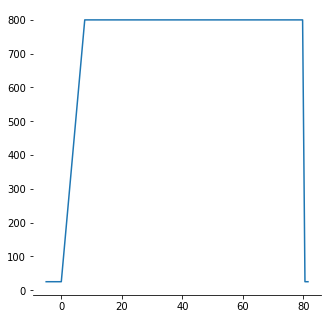

In [72]:
x = []
y = []
for data in graph_data:
    x.append(data[0])
    y.append(data[1])
    
fig = plt.figure(figsize = [20,20])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.plot(x, y)


Our next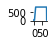 step is to lab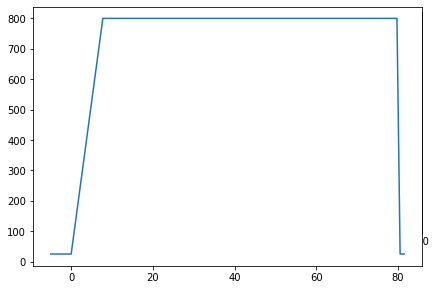el the graph: 